In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import KFold
import numpy as np
import seaborn as sns

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Data exploration and preparation:

In [ ]:
df = pd.read_csv("csvTrainImages 13440x1024.csv", header=None)
df_labels = pd.read_csv("csvTrainLabel 13440x1.csv", header=None)
images = df.to_numpy()
normalized_images = images / 255.

df_test = pd.read_csv("csvTestImages 3360x1024.csv", header=None)
df_labels_test = pd.read_csv("csvTestLabel 3360x1.csv", header=None)
images_test = df_test.to_numpy() / 255.


In [ ]:
unique_classes = df_labels[0].unique()
print (unique_classes)

class_counts = df_labels[0].value_counts().sort_index()
print("Samples per class:\n", class_counts)

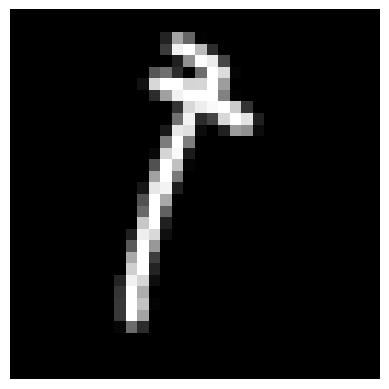

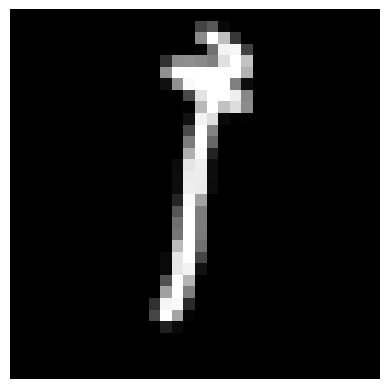

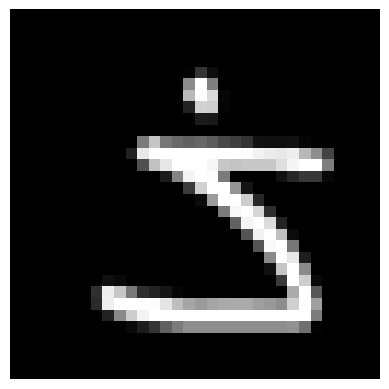

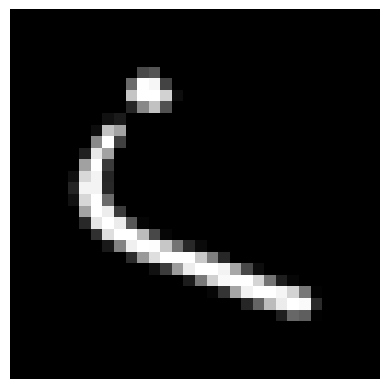

In [3]:
def display_image(image):
    image_size = 32
    image = image.reshape((image_size, image_size))
    rotated_image = np.rot90(image, k=-1)  # 90 degrees clockwise
    plt.imshow(rotated_image, cmap='gray')
    plt.axis('off')
    plt.show()

# Display rotated samples
display_image(images[0])
display_image(images[3])
display_image(images[54])
display_image(images[80])

# Convert labels to NumPy arrays
df_labels = df_labels.to_numpy()
df_labels_test = df_labels_test.to_numpy()

In [4]:
# Assuming df_labels and df_labels_test are NumPy arrays
y_train = df_labels.ravel()
y_test = df_labels_test.ravel()

In [5]:
X_train = normalized_images.reshape(-1, 32, 32, 1)
X_test = images_test.reshape(-1, 32, 32, 1)

y_train = to_categorical(df_labels)
y_test = to_categorical(df_labels_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [6]:
class_to_arabic = {
    1: "أ",
    2: "ب",
    3: "ت",
    4: "ث",
    5: "ج",
    6: "ح",
    7: "خ",
    8: "د",
    9: "ذ",
    10: "ر",
    11: "ز",
    12: "س",
    13: "ش",
    14: "ص",
    15: "ض",
    16: "ط",
    17: "ظ",
    18: "ع",
    19: "غ",
    20: "ف",
    21: "ق",
    22: "ك",
    23: "ل",
    24: "م",
    25: "ن",
    26: "هـ",
    27: "و",
    28: "ي"
}


# SVM

In [9]:
y_train_svm = df_labels.ravel()  # This is already done in your code
y_test_svm = df_labels_test.ravel()

# Flatten the images for SVM (they should be 2D: n_samples x n_features)
X_train_svm = normalized_images.reshape(normalized_images.shape[0], -1)
X_test_svm = images_test.reshape(images_test.shape[0], -1)

# Now train SVM
svm_model = SVC(kernel='rbf', C=20, gamma='scale') 
svm_model.fit(X_train_svm, y_train_svm)

# Evaluate
y_pred_svm = svm_model.predict(X_test_svm)
print("Accuracy:", accuracy_score(y_test_svm, y_pred_svm))
print("F1 Score:", f1_score(y_test_svm, y_pred_svm, average='weighted'))

Accuracy: 0.7270833333333333
F1 Score: 0.7278069711404593


In [11]:
y_pred_letters = [class_to_arabic[i] for i in y_pred_svm]
y_true = np.argmax(y_test, axis=1)
y_true_letters = [class_to_arabic[i] for i in y_true]

Accuracy: 0.7270833333333333
F1 Score: 0.7278069711404593


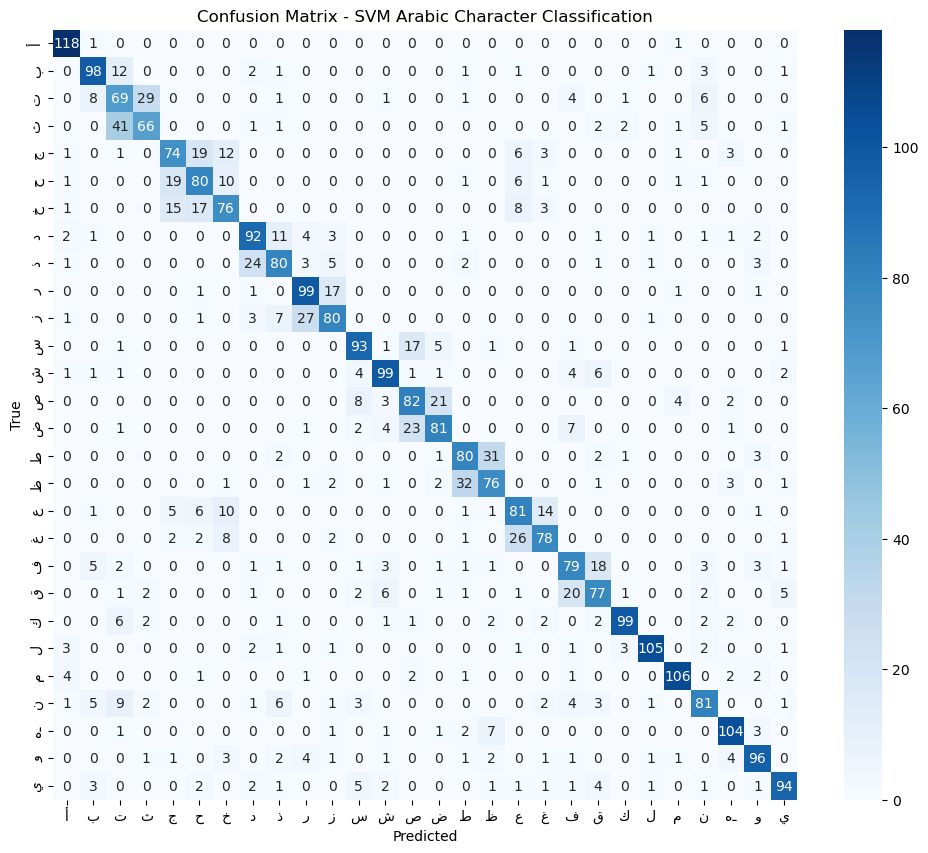

In [16]:
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)
    
SVM_acc = accuracy_score(y_test_svm, y_pred_svm)
f1 = f1_score(y_test_svm, y_pred_svm, average='weighted')
cm = confusion_matrix(y_test_svm, y_pred_svm)

print("Accuracy:", SVM_acc)
print("F1 Score:", f1)

arabic_labels = [class_to_arabic[i + 1] for i in range(len(class_to_arabic))]
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=arabic_labels, yticklabels=arabic_labels)
plt.title('Confusion Matrix - SVM Arabic Character Classification')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# CNN

In [17]:
# Reshape to (num_samples, 32, 32, 1) for CNN
X_train = normalized_images.reshape(-1, 32, 32, 1)
X_test = images_test.reshape(-1, 32, 32, 1)

y_train = to_categorical(df_labels)
y_test = to_categorical(df_labels_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# model 1 with 2 convolution layers and then flatten layer

def CNN_1(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model


In [ ]:
# model 2 with 2 convolution layers and then flatten layer , BatchNormalization Normalizes the output of convolutional layers
#                                                            that helps stabilize and speed up training.

def CNN_2(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),
        
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model


In [20]:
def kfold_train(model_fn, X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    val_accuracies = []
    for train_idx, val_idx in kf.split(X):
        model = model_fn((32, 32, 1), y.shape[1])
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(X[train_idx], y[train_idx], epochs=10, batch_size=64, verbose=0)
        val_loss, val_acc = model.evaluate(X[val_idx], y[val_idx], verbose=0)
        val_accuracies.append(val_acc)
    return np.mean(val_accuracies)

In [ ]:
acc_model1 = kfold_train(CNN_1, X_train, y_train)
acc_model2 = kfold_train(CNN_2, X_train, y_train)
print("Avg Validation Accuracy - Model 1:", acc_model1)
print("Avg Validation Accuracy - Model 2:", acc_model2)

C:\Users\rawan\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Avg Validation Accuracy - Model 1: 0.8803732037544251
Avg Validation Accuracy - Model 2: 0.9228663682937622


In [ ]:
best_model_fn = CNN_2 if acc_model2 > acc_model1 else CNN_1
best_model_fn

<function __main__.create_model_2(input_shape, num_classes)>

In [23]:
best_model = best_model_fn((32, 32, 1), y_train.shape[1])
best_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
best_model.fit(X_train, y_train, epochs=15, batch_size=64, verbose=1)

Epoch 1/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 78ms/step - accuracy: 0.1559 - loss: 3.3509
Epoch 2/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - accuracy: 0.4329 - loss: 1.7689
Epoch 3/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 74ms/step - accuracy: 0.6196 - loss: 1.1544
Epoch 4/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - accuracy: 0.7135 - loss: 0.8397
Epoch 5/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 20s 70ms/step - accuracy: 0.7808 - loss: 0.6640
Epoch 6/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 74ms/step - accuracy: 0.8023 - loss: 0.5671
Epoch 7/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.8314 - loss: 0.4993
Epoch 8/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.8524 - loss: 0.4394
Epoch 9/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.8666 - loss: 0.3877
Epoch 10/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.8840 - loss: 0.3555
Epoch 11/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.8945 - loss: 0.3137
Epoch 12/15
189/189 ━━━━━━━━━━

In [24]:
loss, CNN_acc = best_model.evaluate(X_test, y_test, verbose=1)
print("Test Accuracy:", CNN_acc)

105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9343 - loss: 0.2510
Test Accuracy: 0.9389880895614624


In [ ]:
# Convert y_test from one-hot to class indices
y_test_labels = np.argmax(y_test, axis=1)

y_pred_probs = best_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

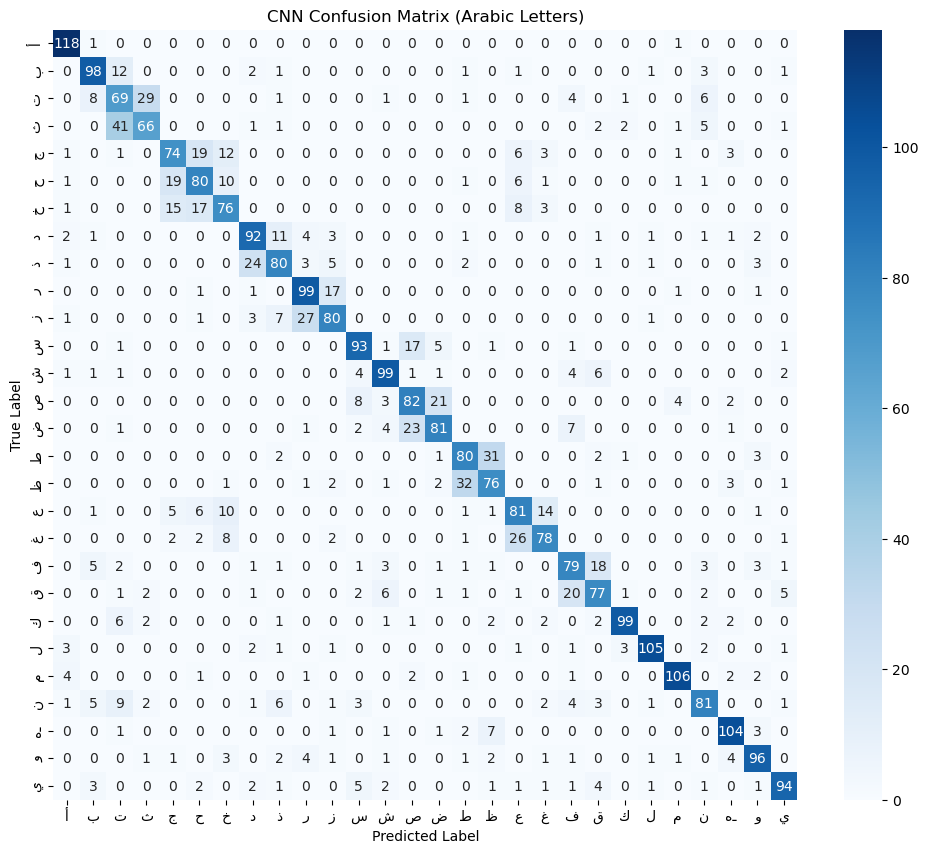

In [28]:
arabic_labels = [class_to_arabic[i+1] for i in range(len(class_to_arabic))]
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=arabic_labels, yticklabels=arabic_labels)
plt.title("CNN Confusion Matrix (Arabic Letters)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Compare these results with the best SVM model results.

In [29]:
print("\n✅ CNN Accuracy:", CNN_acc)
print("✅ SVM Accuracy:", SVM_acc)



✅ CNN Accuracy: 0.9389880895614624
✅ SVM Accuracy: 0.7270833333333333


## Save the best model

In [30]:
# Save and reload
best_model.save("best_cnn_model.h5")
loaded_model = tf.keras.models.load_model("best_cnn_model.h5")

# Predict on new (unlabeled) data
sample_preds = loaded_model.predict(X_test[:5])
print("Sample predictions:", np.argmax(sample_preds, axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Sample predictions: [1 1 2 2 3]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


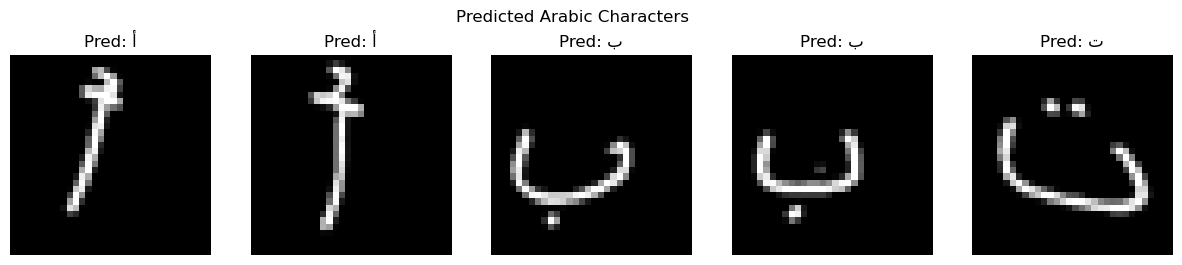

In [33]:
sample_images = X_test[:5]  # or use any unlabeled data of shape (n, 32, 32, 1)
sample_preds = loaded_model.predict(sample_images)
predicted_indices = np.argmax(sample_preds, axis=1)
predicted_labels = [class_to_arabic[i] for i in predicted_indices]  

# Show the images with predicted Arabic labels
plt.figure(figsize=(15, 3))
for i in range(len(sample_images)):
    plt.subplot(1, len(sample_images), i + 1)
    
    # Rotate the image 90 degrees clockwise
    rotated_img = np.rot90(sample_images[i].reshape(32, 32), k=-1)
    
    plt.imshow(rotated_img, cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}")
    plt.axis('off')
plt.suptitle("Predicted Arabic Characters")
plt.show()